In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV,LassoCV
from sklearn.metrics import explained_variance_score,mean_squared_error
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
#loading dataset
df=pd.read_csv('happiness_score_dataset.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

The dataset has 158 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

All the elements are non-null 

In [6]:
df.drop('Standard Error',axis=1,inplace=True)

I am droping Standard error coulmn as it has less meaningful value for this dataset and no information can be found about it

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Lets Visuallize country and Region rankings for all the features and label

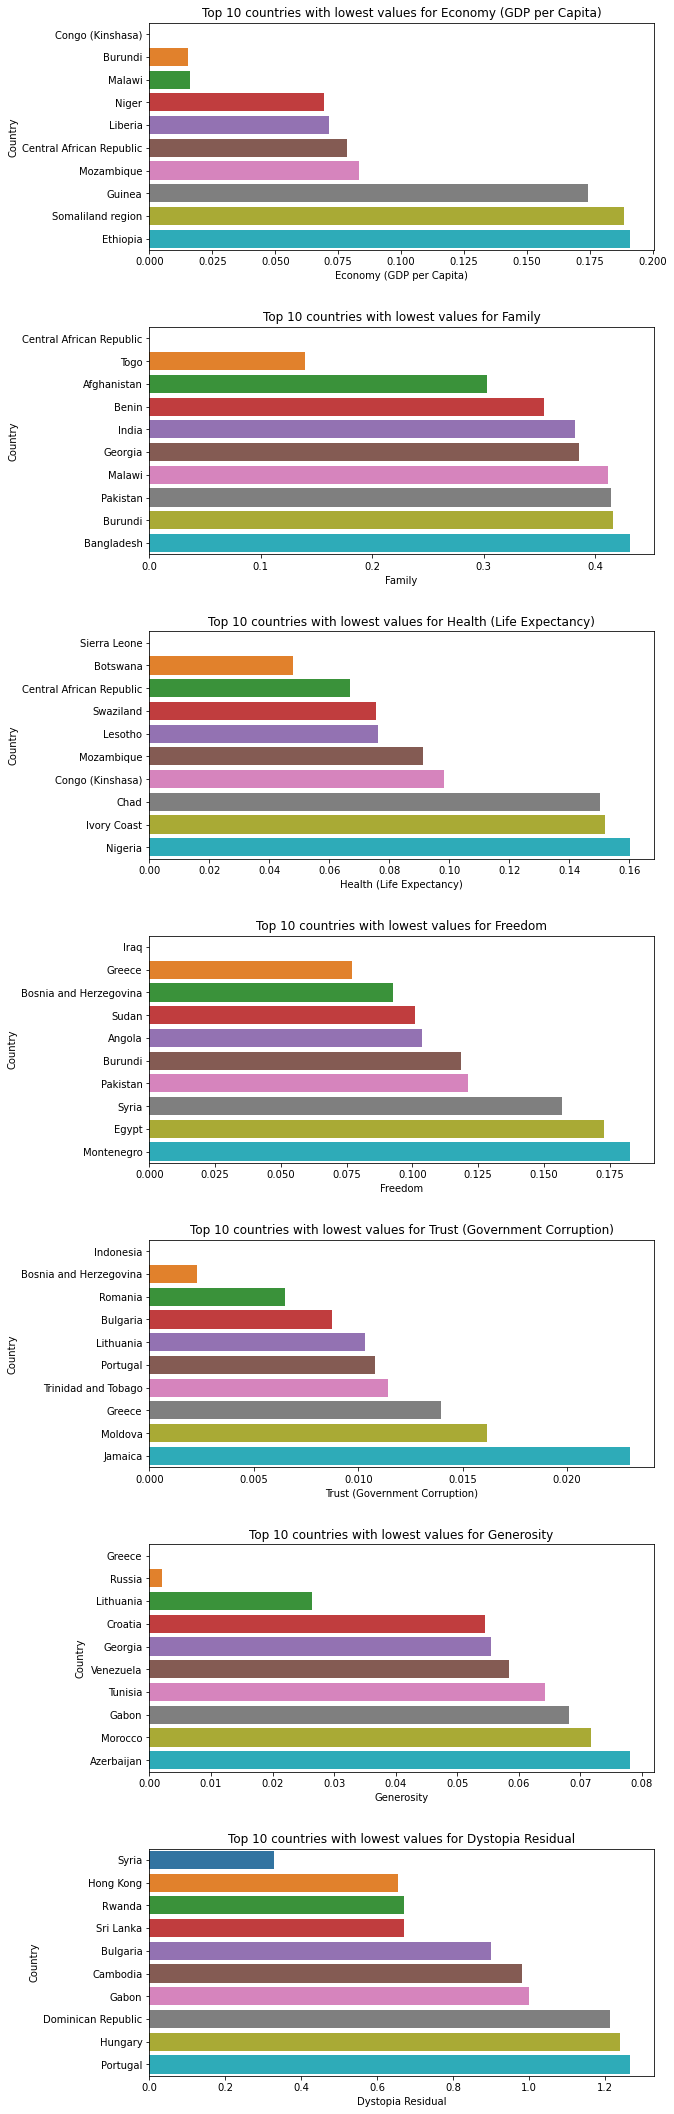

In [8]:
#Checking the lowest ranked countries for all the features
plt.figure(figsize=(10,30))
pn=1
for col in df.iloc[:,4:]:
    if pn<=7:
        ax=plt.subplot(7,1,pn)
        sns.barplot(df.sort_values(col).head(10)[col],
                    df.sort_values(col).head(10)['Country'])
        plt.title('Top 10 countries with lowest values for '+col)
    pn+=1
plt. tight_layout(pad=3)

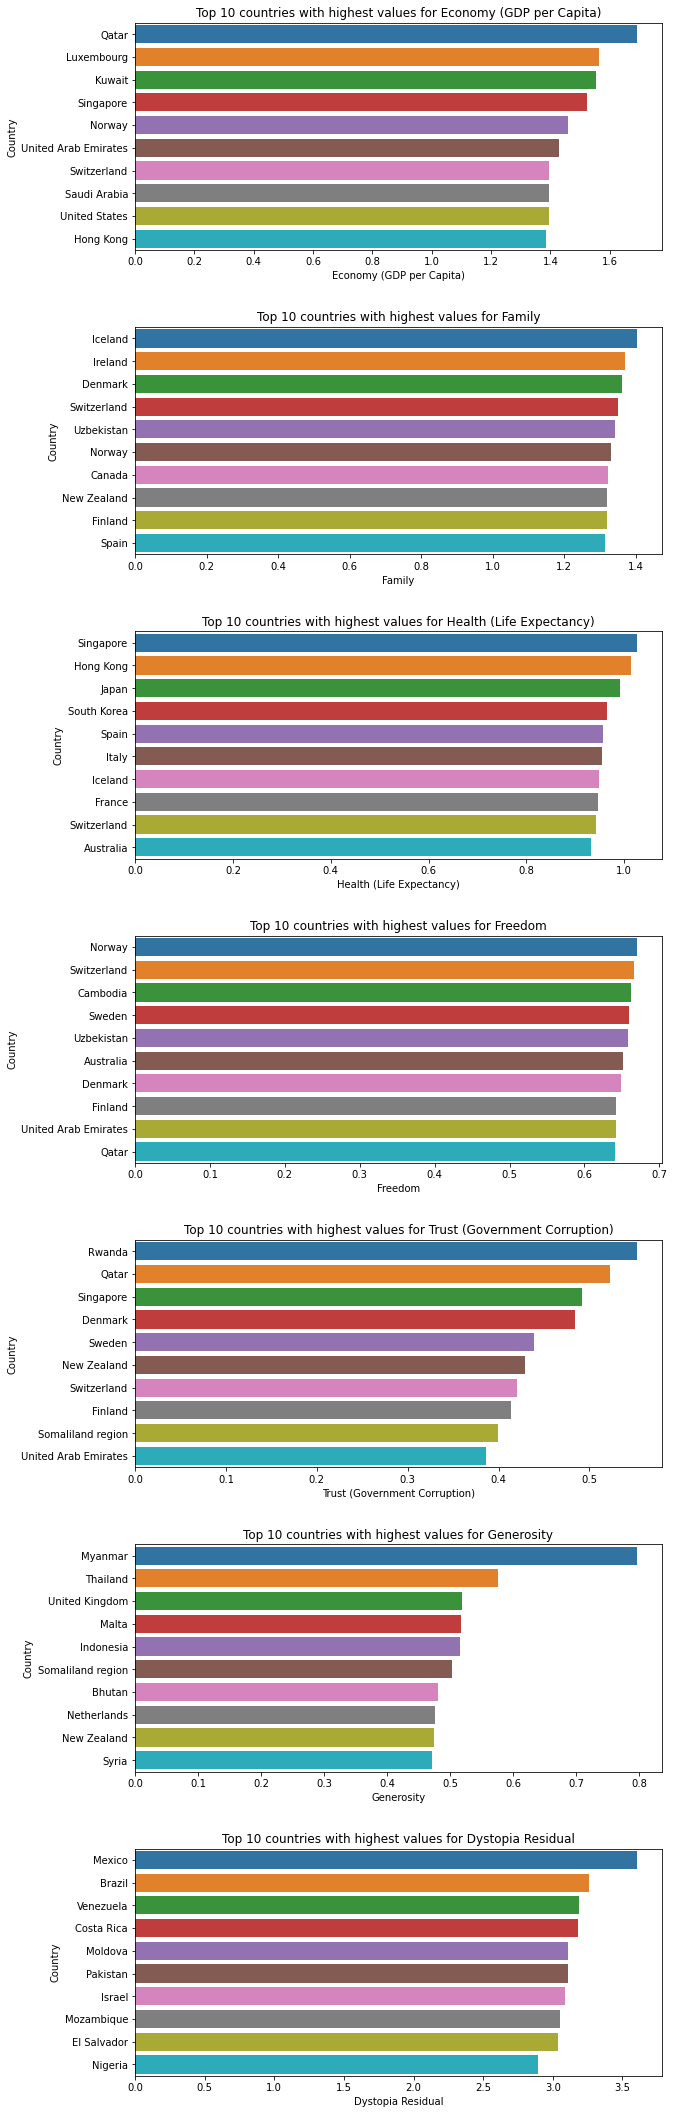

In [9]:
#Checking the highest ranked countries for all the features
plt.figure(figsize=(10,30))
pn=1
for col in df.iloc[:,4:]:
    if pn<=7:
        ax=plt.subplot(7,1,pn)
        sns.barplot(df.sort_values(col,ascending=False).head(10)[col],
                    df.sort_values(col,ascending=False).head(10)['Country'])
        plt.title('Top 10 countries with highest values for '+col)
    pn+=1
plt. tight_layout(pad=3)

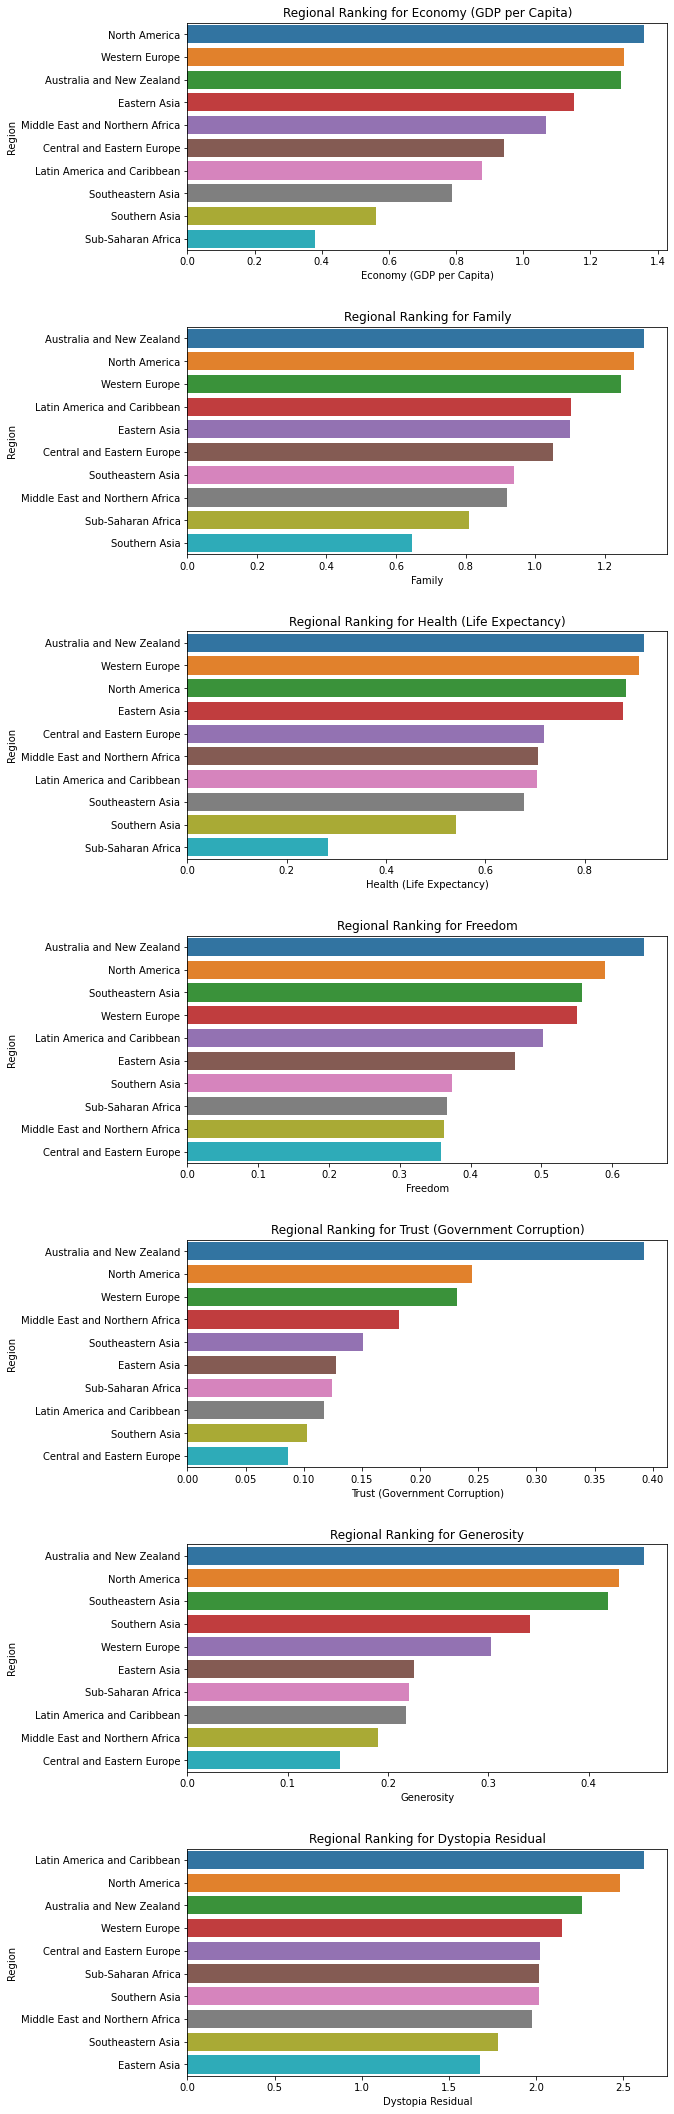

In [10]:
#Region Rankings
plt.figure(figsize=(10,30))
pn=1
for col in df.iloc[:,4:]:
    if pn<=7:
        ax=plt.subplot(7,1,pn)
        sns.barplot(df.groupby('Region').mean().sort_values(col,ascending=False)[col],
                    df.groupby('Region').mean().sort_values(col,ascending=False).index)
        plt.title('Regional Ranking for '+col)
    pn+=1
plt. tight_layout(pad=3)

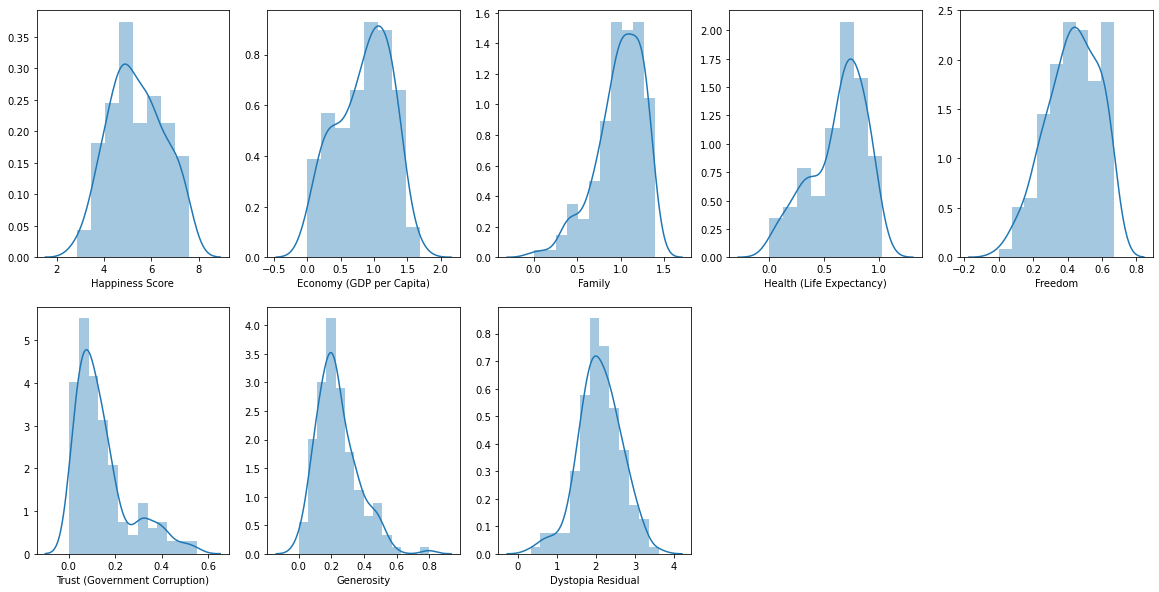

In [11]:
#distplot for all the continuous variable column
plt.figure(figsize=(20,10))
pn=1
for col in df.iloc[:,3:]:
    if pn<=10:
        ax=plt.subplot(2,5,pn)
        sns.distplot(df[col])
    pn+=1
plt.show()

looking at the plot we can observe skewness for some features

In [12]:
#checking skewness of features
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see that Skewness for Economy,Family,Health,Freedom,Trust and Generosity are very high

In [13]:
#using Power Tansformer to reduce skweness
label=['Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity']
pt=PowerTransformer(method='yeo-johnson')
df[label]=pt.fit_transform(df[label].values)
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,2.51738
1,Iceland,Western Europe,2,7.561,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,2.70201
2,Denmark,Western Europe,3,7.527,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,2.49204
3,Norway,Western Europe,4,7.522,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,2.46531
4,Canada,North America,5,7.427,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,1.83302


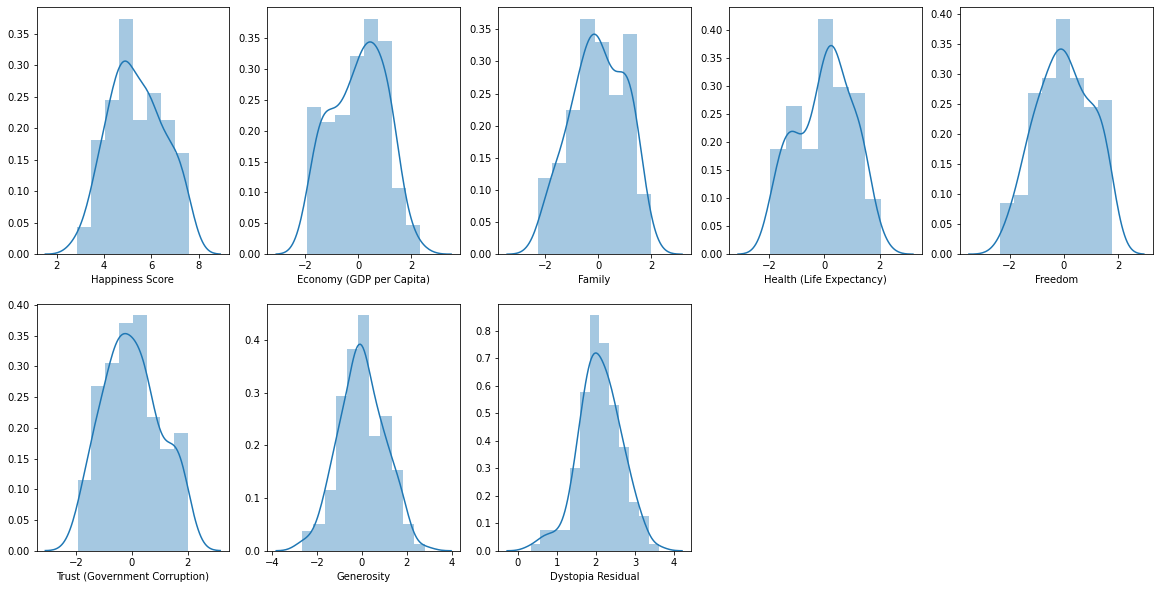

In [14]:
plt.figure(figsize=(20,10))
pn=1
for col in df.iloc[:,3:]:
    if pn<=10:
        ax=plt.subplot(2,5,pn)
        sns.distplot(df[col])
    pn+=1
plt.show()

Plots look better

In [15]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

Skewness value have reduced tremendously

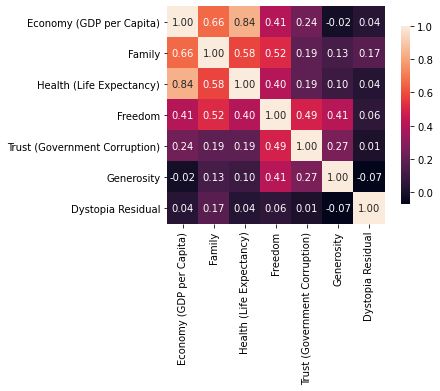

In [16]:
corr=df.iloc[:,4:].corr()
sns.heatmap(corr,cbar=True,square=True,cbar_kws={"shrink":.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

Correlation values for Economy vs Family, Economy vs Health are little high

In [17]:
#assigning Features and Variables
X=df.iloc[:,4:]
y=df['Happiness Score']

In [18]:
#scaling the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
#using Variance Inflation method to check multicollinearity
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,4.439397,Economy (GDP per Capita)
1,2.186123,Family
2,3.555877,Health (Life Expectancy)
3,2.005294,Freedom
4,1.377376,Trust (Government Corruption)
5,1.340543,Generosity
6,1.055050,Dystopia Residual


We can see that Economy and Health has high vif but since its less than 5 i deem it acceptable

In [20]:
#finding the best random state
maxsc=0
maxrs=0
for i in range(1,10000):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=i)
    lin=LinearRegression()
    lin.fit(X_train,y_train)
    score=lin.score(X_test,y_test)
    if score>maxsc:
        maxsc=score
        maxrs=i
print('Maximum score:',maxsc,'\nBest Random State:',maxrs)

Maximum score: 0.996859661317121 
Best Random State: 566


In [21]:
#Using best Random State
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=566)

In [22]:
#linear models used for this dataset 
svr=SVR()
lr=LinearRegression()

In [23]:
#comparing R2 and cv score for the models
sc=[]
cv=[]
diff=[]
j=0
models=[svr,lr]
for i in models:
    i.fit(X_train,y_train)
    sc.append(i.score(X_test,y_test))
    cv.append(cross_val_score(i,X_train,y_train,cv=5).mean())
    diff.append(sc[j]-cv[j])
    j+=1
best_model=pd.DataFrame({'Model Name':['SVR','LinearRegression'],
                     'R2 Score':sc,
                     'Cross Validation Score':cv,'Difference':diff})
best_model.sort_values(by='Difference')

,Model Name,R2 Score,Cross Validation Score,Difference
1,LinearRegression,0.996860,0.987070,0.009790
0,SVR,0.964516,0.909085,0.055431


We can see that linear regression gives the best R2 and Cross validation Score for this dataset

In [24]:
#Using Lasso and Ridge to see if any improvement in score can be obtained 
lcv=LassoCV()
lcv.fit(X_train,y_train)
rcv=RidgeCV()
rcv.fit(X_train,y_train)
las=Lasso(lcv.alpha_)
rid=Ridge(rcv.alpha_)
sc=[]
cv=[]
diff=[]
j=0
models=[las,rid]
for i in models:
    i.fit(X_train,y_train)
    sc.append(i.score(X_test,y_test))
    cv.append(cross_val_score(i,X_train,y_train,cv=5).mean())
    diff.append(sc[j]-cv[j])
    j+=1
linear_best_model=pd.DataFrame({'Model Name':['Lasso','Ridge'],
                     'R2 Score':sc,
                     'Cross Validation Score':cv,'Difference':diff})
linear_best_model.sort_values(by='Difference')

,Model Name,R2 Score,Cross Validation Score,Difference
0,Lasso,0.996889,0.987082,0.009807
1,Ridge,0.996965,0.987020,0.009945


We can see a slight increase in R2 Score for Ridge, so I am using this model for further calculations

In [25]:
#Further Scores of the chosen Model
y_pred=rid.predict(X_test)
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Explained Variance Score:',explained_variance_score(y_test,y_pred))

Root Mean Squared Error: 0.06346750825478346
Explained Variance Score: 0.9970583531310302


Text(0.5, 1.0, 'Actual vs Predicted Happiness Score')

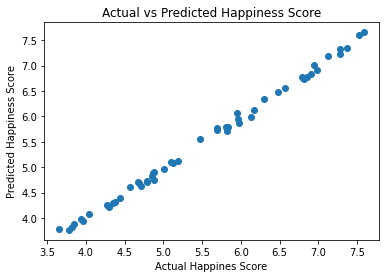

In [26]:
#scatter plot for Actual vs predictd Happiness Score
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happines Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score')

In [27]:
#saving the model
filename = 'World_Happiness_Report'
pickle.dump(las, open(filename, 'wb'))